In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

### Review data

In [2]:
data = pd.read_csv("preprocessed_data.csv")
data.head()
df=data.copy()
df2=data.copy()

In [3]:
data=data.drop(['name','description'],axis='columns')
data.head()

,ranked,score,popularity,favorite,published,serialization,reading,completed,dropped,plan_to_read,genre
0,1,9.47,1,122974,1989,221,364280,87307,10263,154118,3.0
1,2,9.30,26,42935,2004,210,34922,162358,2141,50652,8.0
2,3,9.24,15,40221,1998,161,108564,81383,5054,145679,3.0
3,4,9.22,3,114647,1997,189,465243,30242,18817,46908,10.0
4,5,9.15,29,20528,1994,19,33413,94357,2754,97297,3.0


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  #standardizing before fit

### K-Means

In [9]:
def k_mean(n):
    kmeans = KMeans(n_clusters=n,n_init=100) #số cluster,n_init là siêu tham số
    y_pred=kmeans.fit_predict(X_scaled)
    return y_pred

#### Tìm kiếm số cluster tốt nhất dựa vào silhouette_score


**silhouette_score** là mean của hệ số silhouette trên tất cả điểm, mỗi điểm có hệ số silhouette được tính bằng $(b-a)/max(a,b)$.

Trong đó $a$ là khoảng cách trung bình của mỗi điểm tới điểm khác trong cùng 1 cluster và $b$ là khoảng cách trung bình của điểm đó tới cluster gần nhất. Do đó silhouette_score có miền từ -1 đến +1, nếu càng gần 1 nghĩa là điểm được gom nhóm tốt trong cluster đó và xa với các cluster khác, trong khi đó càng gần 0 thì các điểm càng gần cluster boundary.


In [10]:
from sklearn.metrics import silhouette_score
score={}
for i in range (2,21):
    score[i]= silhouette_score(X_scaled,k_mean(i)) #một dictionary với key là số cluster còn value là silhouette_score cho cluster đó

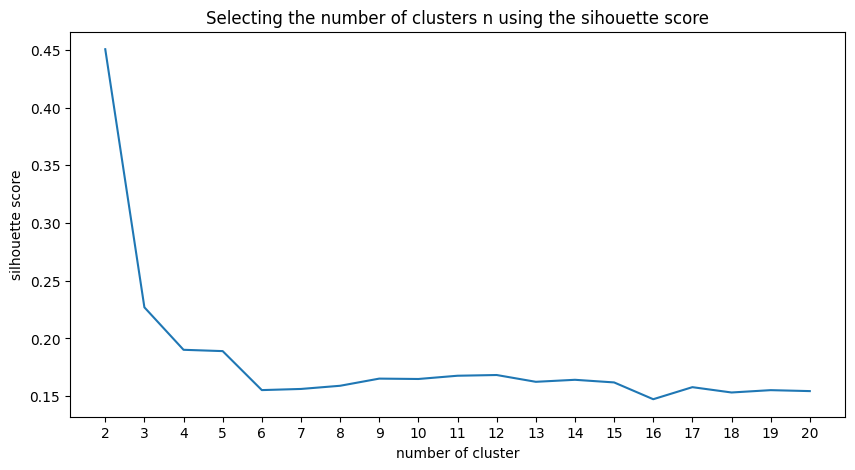

In [20]:
keys = score.keys()
values = score.values()
#plot dictionary for choosing good number of cluster
plt.figure(figsize=(10,5))
plt.plot(keys, values)
plt.xticks(np.arange(len(keys))+2, keys)
plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.title('Selecting the number of clusters n using the sihouette score')
plt.show()

**Dựa vào biểu đồ ta có thể thấy nên chọn cluster là 5**

In [25]:
series=pd.Series(k_mean(5))
df['group']=series #thêm cột series vào data tên group
df.head(15)

,name,ranked,score,popularity,favorite,published,description,serialization,reading,completed,dropped,plan_to_read,genre,group
0,Berserk,1,9.47,1,122974,1989,gut former mercenari known black swordsman rev...,221,364280,87307,10263,154118,3.0,4
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,9.30,26,42935,2004,american old west world greatest race begin th...,210,34922,162358,2141,50652,8.0,1
2,Vagabond,3,9.24,15,40221,1998,16th centuri japan shinmen takez wild rough yo...,161,108564,81383,5054,145679,3.0,4
3,One Piece,4,9.22,3,114647,1997,gol roger man refer king pirat set execut worl...,189,465243,30242,18817,46908,10.0,4
4,Monster,5,9.15,29,20528,1994,kenzou tenma renown japanes neurosurgeon work ...,19,33413,94357,2754,97297,3.0,1
5,Slam Dunk,6,9.09,55,15527,1990,hanamichi sakuragi tall boister teenag flame r...,189,21227,75687,2253,58898,3.0,1
6,Vinland Saga,7,9.06,19,32303,2005,thorfinn son one vike greatest warrior among f...,2,159240,15141,4653,92478,3.0,1
7,Fullmetal Alchemist,8,9.03,20,29927,2001,alchemist knowledg natur talent individu manip...,187,48549,156719,6265,60478,3.0,1
8,Grand Blue,9,9.03,47,17124,2014,among seasid town izu ocean wave ray shine sun...,240,90150,6589,3424,62826,17.0,1
9,Oyasumi Punpun,10,9.01,9,50800,2007,punpun onodera normal 11 year old boy live jap...,20,78888,172476,8297,149155,11.0,4


**Ưu Nhược điểm của thuật toán**

- Ưu: Nhanh chóng và dễ dàng mở rộng.

- Nhược: Dễ gặp cực tiểu địa phương, phải chỉ rõ số cụm cần gom nhóm, không hiệu quả nếu dữ liệu nằm ở các nhóm có kích thước đa dạng,hay đa dạng trong tính tập trung dữ liệu và các nhóm không có tập trung theo dạng hình cầu

### DBSCAN

Cách tiếp cận của thuật toán cho phép xác định cluster của hình dáng bất kỳ (thay vì chỉ tốt ở hình cầu như K-means)

- Với khoảng cách cho trước, thuật toán đếm có bao nhiêu điểm trong cùng 1 khoảng cách $\epsilon$ từ điểm đó. Vùng này gọi là $\epsilon$-neighborhood của điểm đó.

- Nếu điểm đó có ít nhất min_samples điểm trong vùng $\epsilon$-neighborhood (bao gồm bản thân), thì sẽ được gọi là điểm core. Tức điểm core là điểm nằm ở các vùng có mật độ cao.

- Tất cả điểm trong neighborhood của điểm core thuộc cùng 1 cluster.

- Tất cả điểm không là điểm core và không có 1 điểm nào thuộc neighborhood của nó thì xem là điểm bất thường.

*thuật toán hoạt động tốt khi các cluster có mật độ đủ cao, và có thể tách biệt bởi các vùng có mật độ thấp*

In [9]:
dbscan=DBSCAN(eps=1,min_samples=2)
dbscan.fit(X_scaled)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1,  1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1, -1,  1, -1,  1, -1,  2, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  3,  1,  2, -1,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  4,  1,  1,  5, -1, -1, -1, -1,  1,  1,
        5, -1, -1,  1, -1,  1, -1, -1,  6,  1,  7,  1, -1,  1,  1,  1,  1,
       -1,  1,  2, -1, -1, -1,  1,  7, -1,  1,  1, -1, -1,  4, -1, -1, -1,
        1,  3, -1,  8, -1,  1,  6,  4,  1, -1, -1, -1,  9,  1,  1, -1, 10,
        1,  1,  1,  1,  1, -1,  1, 10,  9,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  8,
        1,  1, -1,  8,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1

In [10]:
dbscan=DBSCAN(eps=3,min_samples=2)
dbscan.fit(X_scaled)
dbscan.labels_

array([-1,  0, -1, -1,  1,  2, -1,  0,  2, -1,  2,  2,  1,  2,  2,  2,  2,
        2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  3, -1,  2,  2,  2,  2,
        2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  2, -1,  2,  2,  3,  2,  2,  2,
        2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

**Thuật toán** Không thích hợp cho dữ liệu này vì dữ liệu chúng ta không tách biệt tốt bởi các vùng mật độ thấp. Nếu $\epsilon$ thấp thì đa số điểm là điểm dị thường còn nếu $\epsilon$ cao thì đa số dữ liệu chỉ tách biệt từ 1-2 cluster

### Gaussian Mixtures

Là mô hình xác xuất giả định rằng cùng 1 cluster sẽ được lấy từ cùng 1 phân phối chuẩn

In [22]:
def gaussian_mixture(n):
    gm=GaussianMixture(n_components=n,n_init=10,covariance_type="full") #số cluster,n_init là siêu tham số
    gm.fit(X_scaled)
    y_pred=gm.predict(X_scaled)
    return y_pred,gm.bic(X_scaled),gm.aic(X_scaled)

#### Tìm kiếm số cluster tối ưu dựa trên BIC và AIC

In [23]:
BIC={}
AIC={}
for i in range (2,21):
    _,BIC[i],AIC[i]= gaussian_mixture(i) #BIC and AIC for information criterion

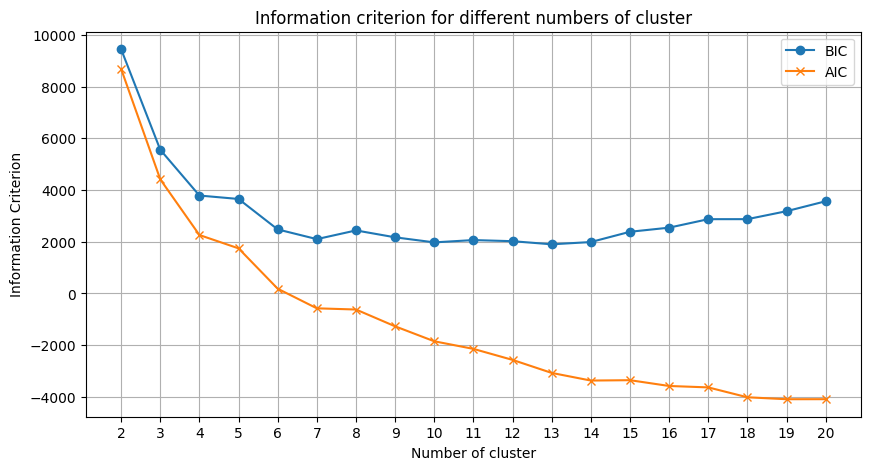

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(list(BIC.keys()), list(BIC.values()), label='BIC', marker='o')
plt.plot(list(AIC.keys()), list(AIC.values()), label='AIC', marker='x')
plt.xticks(np.arange(len(BIC.keys()))+2, keys)
# Adding labels and title
plt.xlabel('Number of cluster')
plt.ylabel('Information Criterion')
plt.title('Information criterion for different numbers of cluster')
plt.legend()
plt.grid(True)
plt.show()

**Nên chọn số cluster bằng 15 dựa theo đồ thị trên**

In [26]:
y_pred,_,_=gaussian_mixture(15)
series= pd.Series(y_pred)
df2['group']=series #thêm cột series vào data tên group
df2.head(15)

,name,ranked,score,popularity,favorite,published,description,serialization,reading,completed,dropped,plan_to_read,genre,group
0,Berserk,1,9.47,1,122974,1989,gut former mercenari known black swordsman rev...,221,364280,87307,10263,154118,3.0,8
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,9.30,26,42935,2004,american old west world greatest race begin th...,210,34922,162358,2141,50652,8.0,3
2,Vagabond,3,9.24,15,40221,1998,16th centuri japan shinmen takez wild rough yo...,161,108564,81383,5054,145679,3.0,11
3,One Piece,4,9.22,3,114647,1997,gol roger man refer king pirat set execut worl...,189,465243,30242,18817,46908,10.0,8
4,Monster,5,9.15,29,20528,1994,kenzou tenma renown japanes neurosurgeon work ...,19,33413,94357,2754,97297,3.0,11
5,Slam Dunk,6,9.09,55,15527,1990,hanamichi sakuragi tall boister teenag flame r...,189,21227,75687,2253,58898,3.0,1
6,Vinland Saga,7,9.06,19,32303,2005,thorfinn son one vike greatest warrior among f...,2,159240,15141,4653,92478,3.0,11
7,Fullmetal Alchemist,8,9.03,20,29927,2001,alchemist knowledg natur talent individu manip...,187,48549,156719,6265,60478,3.0,3
8,Grand Blue,9,9.03,47,17124,2014,among seasid town izu ocean wave ray shine sun...,240,90150,6589,3424,62826,17.0,1
9,Oyasumi Punpun,10,9.01,9,50800,2007,punpun onodera normal 11 year old boy live jap...,20,78888,172476,8297,149155,11.0,11


**Ưu Nhược điểm của thuật toán**

- Ưu: Có thể giải quyết những cụm có đa dạng kích thước, mật độ, hướng hay hình dáng elip thay vì chỉ tốt ở hình cầu như k-means. Cho phép dữ liệu có xác suất thuộc cụm khác (soft clustering). Mạnh mẽ trước nhiễu.

- Nhược: Dễ gặp cực tiểu địa phương, phải chỉ rõ số cụm cần gom nhóm, không hiệu quả nếu dữ liệu thuộc loại categorical, chi phí tính toán cao và tốc độ thấp so với các thuật toán khác như k-means